**A1.4A.19** - Does the system support automated A/B testing and sensitivity analysis?

In this first part of two notebooks, we focus on addressing the aspect of A/B testing.


# A/B Testing

Sure, here is a concise introduction to both Bayesian and Frequentist methods in the context of A/B testing:

1. **Bayesian Method for A/B Testing:**

    *Non-technical description:* In Bayesian A/B testing, you start with an educated guess about how things might turn out (called a "prior"). As the test goes on and you get more data, you update your guess. So, in a sense, Bayesian testing allows you to learn as you go along.

    *Technical description:* The Bayesian approach to A/B testing applies Bayes' theorem to update our knowledge about the test's outcomes. It starts with a prior probability distribution that represents our initial beliefs. As new data comes in, this prior is updated using the likelihood of the observed data under different outcomes, yielding a posterior distribution. The posterior distribution gives a complete picture of the estimated parameter after observing the data, allowing us to make probabilistic statements about the parameter. This is in contrast to frequentist methods, which give point estimates or confidence intervals.

2. **Frequentist Method for A/B Testing:**

    *Non-technical description:* In frequentist A/B testing, you don't make any initial guesses. You start the test, collect all your data, and then make a decision based on that data alone. It's like measuring a race by firing the starting gun, waiting for the runners to cross the finish line, and then seeing who won.

    *Technical description:* The frequentist approach to A/B testing typically applies a statistical hypothesis test like the Chi-square test or T-test. The null hypothesis usually states that there is no difference between the variants, and the alternative hypothesis states that there is a difference. After collecting the data, we calculate a test statistic and a p-value, which represents the probability of observing the data (or more extreme data) assuming the null hypothesis is true. If the p-value is less than a predefined threshold (often 0.05), we reject the null hypothesis and conclude there is a statistically significant difference between the variants. This approach does not incorporate prior beliefs and treats the unknown parameters as fixed values to be estimated.
    
    
While both the Bayesian and Frequentist methods bring unique value to the table in A/B testing, our attention in this notebook will be dedicated exclusively to the Frequentist method. 

**A/B/n testing** - There are other variants of A/B testing, such as A/B/n testing, which is a method of comparing the performance of more than two different versions of a webpage, email, or other piece of content. It's an extension of A/B testing where instead of testing two versions (A and B), you're testing three or more versions (A/B/n).

### Typical Steps for Frequentist Method:

1. **Sample Size Determination**: The initial step involves deciding on the appropriate number of observations for each group (e.g., control vs treatment) in your study.

2. **Randomized Group Allocation and Equivalence Testing**: Divide the sample into control and treatment groups, ensuring group equivalence post-splitting.

3. **A/B Test Execution and User Data Collection**: Initiate the A/B test and systematically collect data on take-up rates for each model on a monthly basis. 

4. **Significance Testing**: After an extended period of data collection, use the t-test to assess the significance of differences in take-up rates between the two models.


Below is Example Data from User

1. `Customer_ID`: Unique identifier for each customer.
2. `Age`: Age of the customer.
3. `Income`: Annual income of the customer.
4. `Membership_Duration`: The duration of the customer's membership or relationship with your company.
5. `Previous_Purchase_Count`: Number of items the customer has purchased in the past.
6. `Avg_Spending`: Average amount the customer spends per transaction.
7. `Offer_Take_Up`: Binary variable (0 or 1) indicating whether the offer was taken up (this would be your target variable).


## 1. Sample Size Determination

The purpose of power analysis is to determine the minimum sample size required to detect an effect of a given size. 

1. **Effect Size**:

   *Non-technical description:* Think of effect size like the magnitude of difference or change that you're interested in. If you're comparing the heights of men and women, the effect size would be how different the average heights are. In other words, it's not just about whether there's a difference or change, but how big that difference or change is.

   *Technical description:* Effect size is a quantitative measure of the magnitude of the experimental effect. The larger the effect size, the stronger the relationship between two variables. In other words, it's the size of the difference that is not due to chance. Commonly used effect size measures include Cohen's d, eta squared, and odds ratio.

2. **Statistical Power**:

   *Non-technical description:* Imagine trying to take a picture of a bird with a camera. The power would be your camera's ability to actually catch the bird in the photo. So, in statistics, power is your test's ability to find a difference or effect when one exists.

   *Technical description:* Power is the probability that a statistical test will correctly reject the null hypothesis when the alternative hypothesis is true. It's the likelihood of detecting an effect when there is an effect to be detected. Power is often set at 0.8 by convention, meaning a 20% chance we might miss an effect that is actually there.

3. **Alpha**:

   *Non-technical description:* Alpha is like the strictness of the rules in a game. The lower the alpha, the stricter the rules. In our bird photo example, a lower alpha might mean you only count perfectly centered pictures of the bird as a success.

   *Technical description:* Alpha is the probability of rejecting the null hypothesis when it's actually true. It's the threshold for defining whether an observed effect was likely due to chance. Commonly set at 0.05, it represents a 5% chance we might claim to have found an effect when in fact there isn't one.

4. **Sample Size**:

   *Non-technical description:* The sample size is simply how many data points (like responses to a survey, or measurements taken) you have. In our bird-watching scenario, it would be the number of photos you took.

   *Technical description:* Sample size is the number of observations or replicates included in a statistical sample. The size of the sample directly affects the precision of estimates and power of hypothesis tests—the larger the sample size, the more precisely we can estimate effect size, and the greater the power to detect effects.




Here, the script generates two plots, one for a significance level of 0.01 and the other for 0.05, with varying sample size and effect sizes.

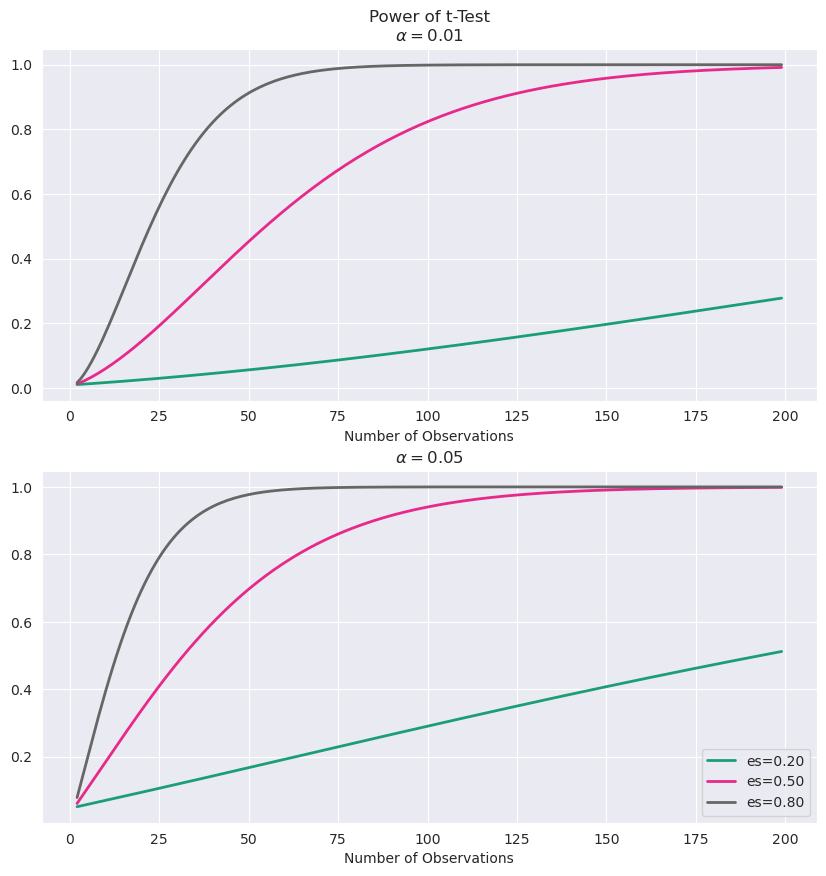

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt
# power vs. sample size
%matplotlib inline
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()

ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

In [218]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# parameters for the analysis
baseline_conversion_rate = 0.39  # Baseline conversion rate is 20%
relative_mde = 0.1  # relative Minimum Detectable Effect is 10%

# calculate the conversion rate if the MDE is realized
new_conversion_rate = baseline_conversion_rate * (1 + relative_mde)

# calculate the effect size
effect_size = proportion_effectsize(baseline_conversion_rate, new_conversion_rate)

alpha = 0.05  # significance level
power = 0.8  # power

power_analysis = NormalIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, 
                                         power=power, 
                                         alpha=alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 2494.19


### 1.1 Create sample data



| Column                 | Description  | Data Type | Value Range | Generation Method |
|------------------------|--------------|-----------|-------------|------------------|
| Customer_ID            | Unique ID for each customer | Integer | 1 to 10,000 | Sequential |
| Age                    | Age of the customer | Integer | 18 to 70 | Randomly generated |
| Income                 | Annual income of the customer | Integer | 30,000 to 120,000 | Randomly generated |
| Membership_Duration    | Duration of the customer's membership in years | Integer | 1 to 10 | Randomly generated |
| Previous_Purchase_Count| Count of previous purchases made by the customer | Integer | 0 to 100 | Randomly generated |
| Avg_Spending           | Average amount spent by the customer | Integer | 50 to 500 | Randomly generated |
| Offer_Take_Up          | Indicator of whether the customer took up an offer | Integer (0 or 1) | - | Derived (1 if Income > 60,000, Membership_Duration > 5, and Avg_Spending > 250; else 0) |

In [127]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(0)

# Set the number of customers
num_customers = 10000

# Create a DataFrame
df = pd.DataFrame({
    "Customer_ID": range(1, num_customers + 1),
    "Age": np.random.randint(18, 70, num_customers),  # Age range 18 to 70
    "Income": np.random.randint(30000, 120000, num_customers),  # Income range 30k to 120k
    "Membership_Duration": np.random.randint(1, 10, num_customers),  # Membership duration 1 to 10 years
    "Previous_Purchase_Count": np.random.randint(0, 100, num_customers),  # Previous purchases 0 to 100
    "Avg_Spending": np.random.randint(50, 500, num_customers),  # Average spending 50 to 500
})

# For offer take up, we'll assume that customers who have high income, 
# longer membership duration, and higher spending are more likely to take up the offer.
# So we'll use a simple rule to generate this column
df["Offer_Take_Up"] = (df["Income"] > 60000) & (df["Membership_Duration"] > 5) & (df["Avg_Spending"] > 250)

# Convert the boolean column to int
df["Offer_Take_Up"] = df["Offer_Take_Up"].astype(int)

# Display the DataFrame
df

Customer_ID  Age  Income  Membership_Duration  Previous_Purchase_Count  \
0               1   62   56032                    9                       40   
1               2   65   66138                    5                        2   
2               3   18   60044                    7                       64   
3               4   21   90997                    7                       68   
4               5   21   40052                    1                       69   
...           ...  ...     ...                  ...                      ...   
9995         9996   28   81945                    7                       53   
9996         9997   27   58362                    3                       87   
9997         9998   39   56187                    1                        7   
9998         9999   53   71541                    3                       54   
9999        10000   46  116842                    4                       23   

      Avg_Spending  Offer_Take_Up  
0              123              0  
1              252              0  
2              148              0  
3               98              0  
4              396              0  
...            ...            ...  
9995           428              1  
9996           364              0  
9997           457              0  
9998           127              0  
9999           233              0  

[10000 rows x 7 columns]

## 2. Randomized Group Allocation and Equivalence Testing

This Python script performs a random group assignment for an experiment control and treatment while testing for group equivalence on a list of variables. It uses both an ANOVA F-test and a chi-squared test to determine equivalence for numeric and categorical variables, respectively.

The `assign_groups` function takes a dictionary defining the ratio of data points in each group (in this case, 'Control' and 'Treatment'), a pandas DataFrame of the data to be assigned, a list of column names to test for equivalence, significance level thresholds for the t-test and chi-squared test, and a maximum number of iterations to perform. 


**Contamination in A/B Testing**: Contamination occurs when an individual in your A/B test is exposed to more than one version of what you're testing (the variants). For example, if you're testing two versions of a webpage, a visitor might see version A one day and version B the next. This contamination can introduce bias and make your results harder to interpret, as the same individual is contributing data to both test groups.

To mitigate contamination:

1. **User Segmentation**: Make sure that each individual is only exposed to one version of the test. In digital experiments, this can often be accomplished by setting cookies or using account-based segmentation.

2. **Time-based Isolation**: Conduct the tests in separate time periods. Version A can be tested in the first period, followed by Version B in the second period. This reduces the chance of an individual being exposed to both versions but does not eliminate it. Moreover, time-based trends could affect the results.

3. **Geographical Segmentation**: You could also separate users based on geographical location, testing one version in one region and the other version in another region.

4. **A/A Test or A/A/B Test**: This is a method where you split your traffic into two identical variants. Since both groups should behave the same, any significant difference in results will suggest systematic bias in the testing system or high variability in measurements. The A/A test helps in checking the presence of any confounding variables and ensures that your testing setup is sound before moving forward with the A/B test. If you identify issues with your A/A test, it's crucial to solve them before proceeding with the actual A/B test. 

In essence, maintaining the integrity of your test groups is key to ensuring that your A/B test results are valid and reliable.

In [128]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency

def assign_groups(ratio_dic, data_table, equiv_cols, t_threshold=0.05, chi_threshold=0.05, max_iters=30):
    group_labels = list(ratio_dic.keys())
    group_sizes = {k: int(v * len(data_table)) for k, v in ratio_dic.items()}
    assignments = np.random.choice(group_labels, len(data_table), replace=True, p=list(ratio_dic.values()))
    data_table['ASSIGNMENT'] = assignments

    for _ in range(max_iters):
        if all([equiv_test(data_table, col, group_labels, t_threshold, chi_threshold) for col in equiv_cols]):
            return data_table
        data_table['ASSIGNMENT'] = np.random.permutation(data_table['ASSIGNMENT'])

    print("Sampling did not achieve equivalence in the allowed number of iterations.")
    return data_table


def equiv_test(table, equiv_var, groups, t_threshold, chi_threshold):
    if table[equiv_var].dtype != "object":
        p = f_oneway(*[table[table.ASSIGNMENT == g][equiv_var] for g in groups])[1]
        if p > t_threshold or np.isnan(p):
            return True
    elif table[equiv_var].dtype == "object":
        observed = [table[table.ASSIGNMENT == g][equiv_var].value_counts() for g in groups]
        p = chi2_contingency(np.array(observed).T)[1]
        if p > chi_threshold:
            return True
    return False

# Use your function
group_ratio_dic = {'Control': 0.5,'Treatment': 0.5}
df = assign_groups(group_ratio_dic, df, ['Age','Income','Membership_Duration','Previous_Purchase_Count','Avg_Spending'])
df

Customer_ID  Age  Income  Membership_Duration  Previous_Purchase_Count  \
0               1   62   56032                    9                       40   
1               2   65   66138                    5                        2   
2               3   18   60044                    7                       64   
3               4   21   90997                    7                       68   
4               5   21   40052                    1                       69   
...           ...  ...     ...                  ...                      ...   
9995         9996   28   81945                    7                       53   
9996         9997   27   58362                    3                       87   
9997         9998   39   56187                    1                        7   
9998         9999   53   71541                    3                       54   
9999        10000   46  116842                    4                       23   

      Avg_Spending  Offer_Take_Up ASSIGNMENT  
0              123              0  Treatment  
1              252              0  Treatment  
2              148              0    Control  
3               98              0  Treatment  
4              396              0    Control  
...            ...            ...        ...  
9995           428              1    Control  
9996           364              0  Treatment  
9997           457              0  Treatment  
9998           127              0  Treatment  
9999           233              0  Treatment  

[10000 rows x 8 columns]

### 2.1 Model Training

This Python script is used for analyzing the effect of an intervention (offer take-up) on two distinct groups: the treatment group and the control group, using the LightGBM algorithm, a gradient boosting framework that uses tree-based learning algorithms.
    
The table below summarizes the features used for each group:

| Group      | Features Used |
| ----------- | ----------- |
| Treatment | 'Age', 'Income', 'Membership_Duration', 'Previous_Purchase_Count', 'Avg_Spending' |
| Control   | 'Age', 'Income' |

In both groups, the target variable that is predicted is 'Offer_Take_Up'. The 'Treatment' group uses additional features compared to the 'Control' group.

In [129]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix


# Define features and target
features_treatment = ['Age', 'Income', 'Membership_Duration', 'Previous_Purchase_Count', 'Avg_Spending']
features_control = ['Age', 'Income']
target = 'Offer_Take_Up'

# For Treatment group
df_treatment = df[df['ASSIGNMENT'] == 'Treatment']
X_train_treatment, X_test_treatment, y_train_treatment, y_test_treatment = train_test_split(
    df_treatment[features_treatment], df_treatment[target], test_size=0.2, random_state=42)

lgbm_model_treatment = LGBMClassifier(random_state=42)
lgbm_model_treatment.fit(X_train_treatment, y_train_treatment)

lgbm_predictions_treatment = lgbm_model_treatment.predict(X_test_treatment)
lgbm_proba_treatment = lgbm_model_treatment.predict_proba(X_test_treatment)[:,1]

print("LightGBM Model - Treatment Group")
print("Accuracy: ", lgbm_model_treatment.score(X_test_treatment, y_test_treatment)) 
print("AUC-ROC: ", roc_auc_score(y_test_treatment, lgbm_proba_treatment))
print("Classification Report: \n", classification_report(y_test_treatment, lgbm_predictions_treatment))
print("Confusion Matrix: \n", confusion_matrix(y_test_treatment, lgbm_predictions_treatment))

# For Control group
df_control = df[df['ASSIGNMENT'] == 'Control']
X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(
    df_control[features_control], df_control[target], test_size=0.2, random_state=42)

lgbm_model_control = LGBMClassifier(random_state=42)
lgbm_model_control.fit(X_train_control, y_train_control)

lgbm_predictions_control = lgbm_model_control.predict(X_test_control)
lgbm_proba_control = lgbm_model_control.predict_proba(X_test_control)[:,1]

print("\nLightGBM Model - Control Group")
print("Accuracy: ", lgbm_model_control.score(X_test_control, y_test_control))
print("AUC-ROC: ", roc_auc_score(y_test_control, lgbm_proba_control))
print("Classification Report: \n", classification_report(y_test_control, lgbm_predictions_control))
print("Confusion Matrix: \n", confusion_matrix(y_test_control, lgbm_predictions_control))


LightGBM Model - Treatment Group
Accuracy:  1.0
AUC-ROC:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       850
           1       1.00      1.00      1.00       150

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix: 
 [[850   0]
 [  0 150]]

LightGBM Model - Control Group
Accuracy:  0.8351648351648352
AUC-ROC:  0.6845033112582781
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       850
           1       0.21      0.03      0.06       151

    accuracy                           0.84      1001
   macro avg       0.53      0.51      0.48      1001
weighted avg       0.75      0.84      0.78      1001

Confusion Matrix: 
 [[831  19]
 [146   5]]


### 2.2 Model Deployment

Certainly! Here's a summary of the Python script with designated headers:

1. **Setup API Client**: Import necessary libraries and setup the IBM Watson Machine Learning API client using specific credentials including URL, instance id, token and version.

2. **Set Default Space**: The default space is set for the API client, which defines the working environment for IBM Watson Machine Learning service.

3. **Control Model Handling**: 
    - **Store the Model**: Store the previously trained control group model in the WML repository with the appropriate metadata.
    - **Deploy the Model**: Deploy the stored control group model on IBM Watson Machine Learning service with the specified deployment metadata.
    - **Create Scoring Payload**: Construct a scoring payload for the control group model. The scoring payload contains the necessary features to be used for making predictions.
    - **Model Scoring**: Use the scoring payload to generate predictions with the deployed control group model.

4. **Treatment Model Handling**:
    - **Store the Model**: Similar to the control model, store the treatment group model in the WML repository with the appropriate metadata.
    - **Deploy the Model**: Deploy the stored treatment group model on IBM Watson Machine Learning service with the specified deployment metadata.
    - **Create Scoring Payload**: Construct a scoring payload for the treatment group model. The scoring payload contains the necessary features to be used for making predictions.
    - **Model Scoring**: Use the scoring payload to generate predictions with the deployed treatment group model. 

At the end of this process, both control and treatment group models are deployed and ready to make predictions using IBM's Watson Machine Learning service.

In [130]:
import os
from ibm_watson_machine_learning import APIClient
cpd_url = 'https://cpd-cpd-instance.apps.ocp-675000m8qo-5pdc.cloud.techzone.ibm.com'
WML_CREDENTIALS = {
                   "url": cpd_url,
                   "instance_id": "openshift",
                    "token" :os.environ['USER_ACCESS_TOKEN'],
                   "version" : "4.6" #If your env is CP4D 4.x.x then specify "4.x.x" instead of "4.5"
                  }
wml_client = APIClient(WML_CREDENTIALS)
# wml_client.set.default_project('de8017b0-4c0e-4162-a13b-2a776abca9dc')
wml_client.set.default_space('ecde2ef6-aaa5-435d-b059-18bdc336a19c')

# Control Model

# Store the control model
metadata = {
    wml_client.repository.ModelMetaNames.NAME: 'ab-control-model',
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')
}
published_model_control = wml_client.repository.store_model(lgbm_model_control, meta_props=metadata)

# Deploy the control model
metadata_deploy = {
    wml_client.deployments.ConfigurationMetaNames.NAME: "Control_Model_Deployment",
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}
created_deployment_control = wml_client.deployments.create(published_model_control["metadata"]["id"], meta_props=metadata_deploy)

# Scoring for Control Model
scoring_payload_control = {
    wml_client.deployments.ScoringMetaNames.INPUT_DATA: [
        {
            'fields': ['Age', 'Income'],
            'values': [
                [35, 50000],  # example of a control group member
            ]
        }
    ]
}

# Get predictions for Control Model
predictions_control = wml_client.deployments.score(created_deployment_control['metadata']['id'], scoring_payload_control)
predictions_control


# Treatment Model

# Store the treatment model
metadata[wml_client.repository.ModelMetaNames.NAME] = 'ab-treatment-model'
published_model_treatment = wml_client.repository.store_model(lgbm_model_treatment, meta_props=metadata)

# Deploy the treatment model
metadata_deploy[wml_client.deployments.ConfigurationMetaNames.NAME] = "Treatment_Model_Deployment"
created_deployment_treatment = wml_client.deployments.create(published_model_treatment["metadata"]["id"], meta_props=metadata_deploy)

# Scoring for Treatment Model
scoring_payload_treatment = {
    wml_client.deployments.ScoringMetaNames.INPUT_DATA: [
        {
            'fields': ['Age', 'Income', 'Membership_Duration', 'Previous_Purchase_Count', 'Avg_Spending'],
            'values': [
                [35, 50000, 5, 20, 200],  # example of a treatment group member
            ]
        }
    ]
}

# Get predictions for Treatment Model
predictions_treatment = wml_client.deployments.score(created_deployment_treatment['metadata']['id'], scoring_payload_treatment)



#######################################################################################

Synchronous deployment creation for uid: '0a63ee40-345c-474f-83c6-e7ecace9eea6' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='49345664-08af-4e00-828e-3a38288f22d6'
------------------------------------------------------------------------------------------------




#######################################################################################

Synchronous deployment creation for uid: 'e4d3bb0f-558a-4486-bd0d-bfb91e97773b' started

#######################################################################################


initializing
Note: online_url is deprecated and

## 3. A/B Test Execution and User Data Collection

`condition_data`: This table contains customer data that meet specific criteria, indicated by the parameters used to generate the random data. These customers are likely high-value customers because they:

1. Are between 18 to 70 years old.
2. Have an income between 60,001 and 120,000.
3. Have a membership duration between 6 to 10 (presumably months or years, not specified).
4. Have made between 0 and 100 purchases previously.
5. Spend on average between 251 and 500 (presumably per month or per purchase, not specified).

Here is an example of what the `condition_data` table could look like:

| Age | Income | Membership_Duration | Previous_Purchase_Count | Avg_Spending |
|-----|--------|---------------------|-------------------------|--------------|
| 25  | 80000  | 7                   | 30                      | 350          |
| 55  | 110000 | 9                   | 45                      | 400          |
| ... | ...    | ...                 | ...                     | ...          |


`remaining_data`: This table contains customer data that do not meet the criteria for the `condition_data` table. These customers are likely lower-value customers because they:

1. Are between 18 to 70 years old.
2. Have an income between 30,000 and 60,000.
3. Have a membership duration between 1 to 5 (presumably months or years, not specified).
4. Have made between 0 and 100 purchases previously.
5. Spend on average between 50 and 250 (presumably per month or per purchase, not specified).

Here is an example of what the `remaining_data` table could look like:

| Age | Income | Membership_Duration | Previous_Purchase_Count | Avg_Spending |
|-----|--------|---------------------|-------------------------|--------------|
| 35  | 50000  | 3                   | 15                      | 150          |
| 45  | 60000  | 5                   | 20                      | 200          |
| ... | ...    | ...                 | ...                     | ...          |

The primary difference between the `condition_data` and `remaining_data` groups is the range of income, membership duration, and average spending. The `condition_data` group has higher income, longer membership duration, and higher average spending compared to the `remaining_data` group.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

num_customers = 200
control_rate = []
treatment_rate = []
control_tables = []  # List to save the 'actual_take_up' tables for control group
treatment_tables = []  # List to save the 'actual_take_up' tables for treatment group

for i in range(8):  # generate 8 datasets
    # --- SECTION 1: DATA GENERATION ---
    if i==0:
        print("\nSECTION 1: Data Generation")
    
    # Number of customers that should satisfy the condition
    num_condition_customers = int(0.1 * num_customers)

    # Create data for customers that satisfy the condition
    condition_data = pd.DataFrame({
        "Age": np.random.randint(18, 70, num_condition_customers),
        "Income": np.random.randint(60001, 120000, num_condition_customers),
        "Membership_Duration": np.random.randint(6, 10, num_condition_customers),
        "Previous_Purchase_Count": np.random.randint(0, 100, num_condition_customers),
        "Avg_Spending": np.random.randint(251, 500, num_condition_customers),
    })

    # Create data for the remaining customers
    remaining_data = pd.DataFrame({
        "Age": np.random.randint(18, 70, num_customers - num_condition_customers),
        "Income": np.random.randint(30000, 60000, num_customers - num_condition_customers),
        "Membership_Duration": np.random.randint(1, 5, num_customers - num_condition_customers),
        "Previous_Purchase_Count": np.random.randint(0, 100, num_customers - num_condition_customers),
        "Avg_Spending": np.random.randint(50, 250, num_customers - num_condition_customers),
    })

    # Concatenate the two dataframes to create the final new_data dataframe
    new_data = pd.concat([condition_data, remaining_data], ignore_index=True)

    # Shuffle the rows in the new_data dataframe
    new_data = new_data.sample(frac=1).reset_index(drop=True)
    
    # Display the first five rows of the new_data dataframe to provide an example of the generated data
    if i == 0:
        print("\nExample data:")
        display(new_data.head())

    # --- SECTION 2: MODEL SCORING ---
    if i==0:
        print("\nSECTION 2: Model Scoring")

    # Scoring for Control Model
    scoring_payload_control = {
        wml_client.deployments.ScoringMetaNames.INPUT_DATA: [
            {
                'fields': list(new_data.columns[:2]),  # Age, Income
                'values': new_data[['Age', 'Income']].values.tolist(),
            }
        ]
    }

    predictions_control = wml_client.deployments.score(created_deployment_control['metadata']['id'], scoring_payload_control)

    # Scoring for Treatment Model
    scoring_payload_treatment = {
        wml_client.deployments.ScoringMetaNames.INPUT_DATA: [
            {
                'fields': list(new_data.columns),  # all fields
                'values': new_data.values.tolist(),
            }
        ]
    }

    predictions_treatment = wml_client.deployments.score(created_deployment_treatment['metadata']['id'], scoring_payload_treatment)
    
    # Create DataFrames with appropriate column names
    control_predictions_df = pd.DataFrame(predictions_control['predictions'][0]['values'], columns=['prediction', 'probability'])
    treatment_predictions_df = pd.DataFrame(predictions_treatment['predictions'][0]['values'], columns=['prediction', 'probability'])

    # Display the first five rows of the 'control_predictions_df' dataframe to provide an example of the scoring results
    if i == 0:
        print("\nTreatment model scoring results:")
        display(treatment_predictions_df.head())
    # --- SECTION 3: SCORING DATA TRANSFORMATION ---
   

    # Separate probability values into different columns for each class
    control_predictions_df[['probability_class_0', 'probability_class_1']] = pd.DataFrame(control_predictions_df['probability'].tolist(), index=control_predictions_df.index)
    treatment_predictions_df[['probability_class_0', 'probability_class_1']] = pd.DataFrame(treatment_predictions_df['probability'].tolist(), index=treatment_predictions_df.index)

  
    
    if i==0:
        print("\nSECTION 3: Scoring Data Transformation")
 

        # Display the first few rows of the sorted dataframe
        display(treatment_predictions_df.head())
        
        
    # Now, drop the original 'probability' columns
    control_predictions_df.drop(columns=['probability','probability_class_0','prediction'], inplace=True)
    treatment_predictions_df.drop(columns=['probability','probability_class_0','prediction'], inplace=True)

    # --- SECTION 4: TOP 10% SELECTION  ---

    # Select top 10% of individuals based on 'prediction' values
    top_10_percent_control = control_predictions_df.nlargest(int(0.1 * num_customers), 'probability_class_1')
    top_10_percent_treatment = treatment_predictions_df.nlargest(int(0.1 * num_customers), 'probability_class_1')
     
    # Display the first five rows of the 'top_10_percent_control' tables for control group and treatment group
    if i == 0:
        print("\nSECTION 4: Top 10% Selection")
#         print("\nExample of 'top_10_percent_control' for control group:")
#         display(top_10_percent_control.head())
        print("\nExample of 'top_10_percent_control' for treatment group:")
        display(top_10_percent_treatment.head())
        
    # --- SECTION 5: ACTUAL TAKE-UP SIMULATION  ---
    

    # Create the 'actual_take_up' column for control
    size_control = len(top_10_percent_control)
    top_10_percent_control['actual_take_up'] = np.random.choice([0, 1], size=size_control, p=[0.6, 0.4])

    # Create the 'actual_take_up' column for treatment
    size_treatment = len(top_10_percent_treatment)
    top_10_percent_treatment['actual_take_up'] = np.random.choice([0, 1], size=size_treatment, p=[0.2, 0.8])

    # Now, drop the 'probability_class_1' columns
    top_10_percent_control.drop(columns=['probability_class_1'], inplace=True)
    top_10_percent_treatment.drop(columns=['probability_class_1'], inplace=True)
    
    # Display the first five rows of the 'actual_take_up' tables for control group and treatment group
    if i == 0:
#         print("\nExample of 'actual_take_up' for control group:")
#         display(top_10_percent_control.head())
        print("\nSECTION 5: Actual Take-up Simulation")
        print("\nExample of 'actual_take_up' for treatment group:")
        display(top_10_percent_treatment.head())
    
    # Append the 'actual_take_up' tables to their respective lists
    control_tables.append(top_10_percent_control)
    treatment_tables.append(top_10_percent_treatment)

    # --- SECTION 6: TAKE-UP RATES CALCULATION ---
    if i==0:
        print("\nSECTION 6: Take-Up Rates Calculation")
    
    # Calculate take-up rate for control
    control_rate.append(top_10_percent_control['actual_take_up'].mean())
    print(f'Take-up rate for control for week {i+1}: {control_rate[-1] * 100:.2f}%')

    # Calculate take-up rate for treatment
    treatment_rate.append(top_10_percent_treatment['actual_take_up'].mean())
    print(f'Take-up rate for treatment for week {i+1}: {treatment_rate[-1] * 100:.2f}%')

    
# Calculate overall take-up rates
overall_control_rate = np.mean(control_rate)
overall_treatment_rate = np.mean(treatment_rate)

# Add a 'week' column before concatenating the dataframes
for i in range(8):
    control_tables[i]['week'] = i + 1
    treatment_tables[i]['week'] = i + 1

# Concatenate all the dataframes in the control_tables and treatment_tables list into a single table
control_table = pd.concat(control_tables, ignore_index=True)
treatment_table = pd.concat(treatment_tables, ignore_index=True)

# Add date information
start_date = pd.to_datetime('2023-06-01')
control_table['date'] = control_table['week'].apply(lambda x: start_date + pd.DateOffset(weeks=x-1))
treatment_table['date'] = treatment_table['week'].apply(lambda x: start_date + pd.DateOffset(weeks=x-1))


# Add a new column to indicate the group
control_table['group'] = 'control'
treatment_table['group'] = 'treatment'

# Concatenate the tables into one table
combined_table = pd.concat([control_table, treatment_table], ignore_index=True)
print("\nFinal Combined Table")
display(combined_table)





SECTION 1: Data Generation

Example data:


Age  Income  Membership_Duration  Previous_Purchase_Count  Avg_Spending
0   58  116640                    6                       44           381
1   43   46302                    2                       96           195
2   46   51139                    1                       97           231
3   37   50861                    3                        3           216
4   44   36869                    3                       25           192


SECTION 2: Model Scoring

Treatment model scoring results:


prediction                                  probability
0           1  [3.419394720127755e-05, 0.9999658060527987]
1           0  [0.9999923531250109, 7.646874989128865e-06]
2           0  [0.9999923531250109, 7.646874989128635e-06]
3           0  [0.9999923531250109, 7.646874989128608e-06]
4           0  [0.9999923531250109, 7.646874989129016e-06]


SECTION 3: Scoring Data Transformation


prediction                                  probability  \
0           1  [3.419394720127755e-05, 0.9999658060527987]   
1           0  [0.9999923531250109, 7.646874989128865e-06]   
2           0  [0.9999923531250109, 7.646874989128635e-06]   
3           0  [0.9999923531250109, 7.646874989128608e-06]   
4           0  [0.9999923531250109, 7.646874989129016e-06]   

   probability_class_0  probability_class_1  
0             0.000034             0.999966  
1             0.999992             0.000008  
2             0.999992             0.000008  
3             0.999992             0.000008  
4             0.999992             0.000008


SECTION 4: Top 10% Selection

Example of 'top_10_percent_control' for treatment group:


probability_class_1
175             0.999966
161             0.999966
94              0.999966
184             0.999966
0               0.999966


SECTION 5: Actual Take-up Simulation

Example of 'actual_take_up' for treatment group:


actual_take_up
175               0
161               1
94                0
184               1
0                 1


SECTION 6: Take-Up Rates Calculation
Take-up rate for control for week 1: 25.00%
Take-up rate for treatment for week 1: 80.00%
Take-up rate for control for week 2: 35.00%
Take-up rate for treatment for week 2: 85.00%
Take-up rate for control for week 3: 35.00%
Take-up rate for treatment for week 3: 85.00%
Take-up rate for control for week 4: 30.00%
Take-up rate for treatment for week 4: 75.00%
Take-up rate for control for week 5: 35.00%
Take-up rate for treatment for week 5: 65.00%
Take-up rate for control for week 6: 55.00%
Take-up rate for treatment for week 6: 85.00%
Take-up rate for control for week 7: 20.00%
Take-up rate for treatment for week 7: 90.00%
Take-up rate for control for week 8: 50.00%
Take-up rate for treatment for week 8: 85.00%

Final Combined Table


actual_take_up  week       date      group
0                 0     1 2023-06-01    control
1                 0     1 2023-06-01    control
2                 0     1 2023-06-01    control
3                 1     1 2023-06-01    control
4                 0     1 2023-06-01    control
..              ...   ...        ...        ...
315               1     8 2023-07-20  treatment
316               0     8 2023-07-20  treatment
317               1     8 2023-07-20  treatment
318               1     8 2023-07-20  treatment
319               1     8 2023-07-20  treatment

[320 rows x 4 columns]

### Save the csv file

In [ ]:
# Import the lib
from ibm_watson_studio_lib import access_project_or_space
wslib = access_project_or_space()

# let's assume you have the pandas DataFrame  pandas_df which contains the data
# you want to save as a csv file
wslib.save_data("combined_table.csv", combined_table.to_csv(index=False).encode(),overwrite=True)

# the function returns a dict which contains the asset_name, asset_id, file_name and additional information
# upon successful saving of the data

## 4. Significant Testing

A t-test is performed to statistically compare the mean take-up rates between the control and the treatment groups. The t-test yields a t-statistic, which measures the size of the difference relative to the variation in the data, and a p-value, which is used to determine the significance of the results.

In [258]:
print("Control Group 'actual_take_up':")
display(control_table.head())
print("\nTreatment Group 'actual_take_up':")
display(treatment_table.head())

print(f'Overall take-up rate for control group: {overall_control_rate * 100:.2f}%')
print(f'Overall take-up rate for treatment group: {overall_treatment_rate * 100:.2f}%')

# Perform a t-test to compare the rates
# t_stat, p_value = stats.ttest_ind(control_rate, treatment_rate)
t_stat, p_val = ttest_ind(control_table['actual_take_up'], treatment_table['actual_take_up'])


print(f't-statistic: {t_stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The difference in take-up rates between the control group and the treatment group is statistically significant.')
else:
    print('The difference in take-up rates between the control group and the treatment group is not statistically significant.')



Control Group 'actual_take_up':


actual_take_up  week       date    group
0               0     1 2023-06-01  control
1               0     1 2023-06-01  control
2               0     1 2023-06-01  control
3               1     1 2023-06-01  control
4               0     1 2023-06-01  control


Treatment Group 'actual_take_up':


actual_take_up  week       date      group
0               0     1 2023-06-01  treatment
1               1     1 2023-06-01  treatment
2               0     1 2023-06-01  treatment
3               1     1 2023-06-01  treatment
4               1     1 2023-06-01  treatment

Overall take-up rate for control group: 35.62%
Overall take-up rate for treatment group: 81.25%
t-statistic: -9.312191869192679
p-value: 8.272986599131228e-05
The difference in take-up rates between the control group and the treatment group is statistically significant.
